In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
page=requests.get('https://www.flipkart.com/search?q=television&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off')

In [3]:
url='https://www.flipkart.com/search?q=television&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

In [4]:
soup=BeautifulSoup(page.text)


In [5]:
for i in soup.find_all("div",class_='KzDlHZ'):
    print(i.text)

Thomson FA Series 80 cm (32 inch) HD Ready LED Smart Android TV with Dolby Digital Plus & Android 11
Thomson Phoenix 80 cm (32 inch) QLED HD Ready Smart Android TV 48W Sound Output
TCL L4B 79.97 cm (32 inch) HD Ready LED Smart Android TV 2024 Edition with Metallic Bezel Less and Chr...
TCL S5500AF 79.97 cm (32 inch) Full HD LED Smart Android TV 2024 Edition with Metallic Bezel Less and ...
Thomson Phoenix 108 cm (43 inch) QLED Ultra HD (4K) Smart Google TV Dolby Vision & Atmos
Panasonic 80 cm (32 inch) HD Ready LED Smart Google TV
TCL S5500 79.97 cm (32 inch) Full HD LED Smart Google TV 2024 Edition with 1.5 GB RAM + 16 GB ROM
realme TechLife CineSonic Q 80 cm (32 inch) QLED HD Ready Smart Google TV 40 W Speaker
Thomson FA Series 106 cm (42 inch) Full HD LED Smart Android TV with Dolby Digital Plus & Android 11
TCL V6B 108 cm (43 inch) Ultra HD (4K) LED Smart Google TV 2024 Edition with 24W Dolby Audio and Metal...
Mi by Xiaomi X Pro QLED 108 cm (43 inch) QLED Ultra HD (4K) Smart Googl

In [6]:
models = []

for i in soup.find_all("div", class_='KzDlHZ'):
    text = i.text.strip()

    pattern = r"^(.*?)\s*\d+\s?cm\s?\(\d+\s?inch\)\s?"
    model = re.sub(pattern, '', text).strip()  # Remove brand and size
    models.append(model)

print(models)


['HD Ready LED Smart Android TV with Dolby Digital Plus & Android 11', 'QLED HD Ready Smart Android TV 48W Sound Output', 'HD Ready LED Smart Android TV 2024 Edition with Metallic Bezel Less and Chr...', 'Full HD LED Smart Android TV 2024 Edition with Metallic Bezel Less and ...', 'QLED Ultra HD (4K) Smart Google TV Dolby Vision & Atmos', 'HD Ready LED Smart Google TV', 'Full HD LED Smart Google TV 2024 Edition with 1.5 GB RAM + 16 GB ROM', 'QLED HD Ready Smart Google TV 40 W Speaker', 'Full HD LED Smart Android TV with Dolby Digital Plus & Android 11', 'Ultra HD (4K) LED Smart Google TV 2024 Edition with 24W Dolby Audio and Metal...', 'QLED Ultra HD (4K) Smart Google TV 4K Dolby Vision | Dolby Au...', 'Ultra HD (4K) LED Smart Google TV with Dolby Vision IQ | HDR10+ | ...', 'QLED Ultra HD (4K) Smart Google TV T-SCREEN |Dolby Vision-Atmos | Hands-Free...', 'Full HD LED Smart Android TV with Dolby Digital Plus & Android 11', 'Full HD LED Smart Android TV with Dolby Digital Plus & Android

In [7]:
pattern = r"^(.*?)\s\d+\s?cm\s\((\d+)\s?inch\)"
Company= []
Length = []
# Loop through products and extract details
for i in soup.find_all("div",class_='KzDlHZ'):
    match = re.search(pattern, i.text)
    if match:
        Company.append(match.group(1))  # Append title (company)
        Length.append(match.group(2))  # Append length (inch)
    else:
        Company.append(np.nan)
        Length.append(np.nan)

print("Company:", Company)
print("Length:", Length)


Company: ['Thomson FA Series', 'Thomson Phoenix', nan, nan, 'Thomson Phoenix', 'Panasonic', nan, 'realme TechLife CineSonic Q', 'Thomson FA Series', 'TCL V6B', 'Mi by Xiaomi X Pro QLED', 'Mi by Xiaomi X Pro', 'TCL C655', 'Thomson FA Series', 'Thomson FA Series', 'MOTOROLA', 'Infinix', nan, 'MarQ by Flipkart', 'Mi by Xiaomi A Series', 'iFFALCON by TCL U62', nan, 'TCL C69B', 'MOTOROLA EnvisionX']
Length: ['32', '32', nan, nan, '43', '32', nan, '32', '42', '43', '43', '43', '55', '43', '40', '50', '32', nan, '24', '32', '65', nan, '55', '40']


In [8]:
Rating=[]
for i in soup.find_all("div",class_='XQDdHH'):
    Rating.append(i.text)
Rating

['4.3',
 '4.4',
 '4.1',
 '4.1',
 '4.4',
 '4.2',
 '4.1',
 '4.1',
 '4.3',
 '4.1',
 '4.1',
 '4.3',
 '4.2',
 '4.3',
 '4.3',
 '4.3',
 '4.2',
 '3.9',
 '4.1',
 '4.3',
 '4.2',
 '4.3',
 '4.2',
 '4.2',
 '4.2',
 '4',
 '4',
 '4.3',
 '5',
 '5',
 '4.3',
 '5',
 '5',
 '4.1',
 '5',
 '5',
 '4.2',
 '5',
 '5']

In [9]:

operating_systems = []
ultra_hd = []
four_k = []
pixels = []
resolutions = []
launch_years = []
warranties = []

# Loop through the soup object to extract details
for i in soup.find_all("div", class_='_6NESgJ'):
    # Extract Operating System
    os_match = re.search(r'Operating System: (.+?)(HD|Full HD|Ultra HD|\d+ x \d+)', i.text)
    operating_systems.append(os_match.group(1).strip() if os_match else "N/A")

    # Extract Ultra HD (Separate column for Ultra HD)
    ultra_hd_match = re.search(r'(Ultra HD)', i.text)
    ultra_hd.append("Yes" if ultra_hd_match else "No")

    # Extract 4K (Separate column for 4K)
    four_k_match = re.search(r'(4K)', i.text)
    four_k.append("Yes" if four_k_match else "No")

    # Extract Resolution (e.g., HD Ready, Full HD, Ultra HD with details like pixels)
    resolution_match = re.search(r'(HD Ready|Full HD|Ultra HD.*?\d+ x \d+ Pixels)', i.text)
    resolutions.append(resolution_match.group(1).strip() if resolution_match else "N/A")

    # Extract Pixels (if there is a specific resolution like "x x pixels")
    pixel_match = re.search(r'(\d+ x \d+ Pixels)', i.text)
    pixels.append(pixel_match.group(1).strip() if pixel_match else "N/A")

    # Extract Launch Year
    year_match = re.search(r'Launch Year: (\d+)', i.text)
    launch_years.append(year_match.group(1).strip() if year_match else "N/A")

    # Extract Warranty
    warranty_match = re.search(r'(\d+ Year.*?Warranty.*?)$', i.text)
    warranties.append(warranty_match.group(1).strip() if warranty_match else "N/A")

# Print the separate lists
print("Operating Systems:", operating_systems)
print("Ultra HD:", ultra_hd)
print("4K:", four_k)
print("Resolution:", resolutions)
print("Pixels:", pixels)
print("Launch Years:", launch_years)
print("Warranties:", warranties)


Operating Systems: ['Android', 'Android', 'Android', 'Android', 'Google TV', 'Google TV', 'Google TV', 'Google TV', 'Android', 'Google TV', 'Google TV', 'Google TV', 'Google TV', 'Android', 'Android', 'Google TV', 'Linux', 'N/A', 'N/A', 'Google TV', 'Google TV', 'Linux', 'Google TV', 'Google TV']
Ultra HD: ['No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No']
4K: ['No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No']
Resolution: ['HD Ready', 'HD Ready', 'HD Ready', 'Full HD', 'N/A', 'HD Ready', 'Full HD', 'HD Ready', 'Full HD', 'Ultra HD (4K) 3840 x 2160 Pixels', 'Ultra HD (4K) 3840 x 2160 Pixels', 'Ultra HD (4K) 3840 x 2160 Pixels', 'Ultra HD (4K) 3840 x 2160 Pixels', 'Full HD', 'Full HD', 'Ultra HD (4K) 3840 x 2160 Pixels', 'HD Ready', 'HD Ready', 'HD Ready', 'HD Ready', 'Ultra HD (4K) 3840

In [10]:
price=[]
for i in soup.find_all("div",class_='Nx9bqj _4b5DiR'):
    price.append(i.text)
price


['₹9,999',
 '₹11,499',
 '₹9,490',
 '₹10,990',
 '₹20,999',
 '₹15,490',
 '₹12,490',
 '₹11,999',
 '₹15,499',
 '₹21,990',
 '₹34,999',
 '₹30,999',
 '₹40,990',
 '₹16,999',
 '₹14,999',
 '₹28,999',
 '₹8,499',
 '₹8,499',
 '₹5,999',
 '₹14,499',
 '₹35,999',
 '₹6,399',
 '₹37,990',
 '₹17,499']

In [11]:
len(price)

24

In [12]:
from urllib.request import urlopen


In [13]:
#pagination
# Initialize lists for the dataset
operating_systems = []
ultra_hd = []
four_k = []
resolution = []  
display = []  
launch_years = []
warranties = []
ratings = []
companies = []
models = []
lengths = []
prices = []

# Loop through pages from 1 to 60 (or any desired range)
for i in range(1, 65):
    url = f"https://www.flipkart.com/search?q=television&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')

    # Extract Price
    for i in soup.find_all("div", class_='Nx9bqj _4b5DiR'):
        prices.append(i.text)

    # Extract Operating System, Ultra HD, 4K, Display, Resolution, Launch Year, and Warranty
    for i in soup.find_all("div", class_='_6NESgJ'):
        # Extract Operating System
        os_match = re.search(r'Operating System: (.+?)(HD|Full HD|Ultra HD|\d+ x \d+)', i.text)
        operating_systems.append(os_match.group(1).strip() if os_match else "N/A")

        # Extract Ultra HD (Separate column for Ultra HD)
        ultra_hd_match = re.search(r'(Ultra HD)', i.text)
        ultra_hd.append("Yes" if ultra_hd_match else "No")

        # Extract 4K (Separate column for 4K)
        four_k_match = re.search(r'(4K)', i.text)
        four_k.append("Yes" if four_k_match else "No")

        # Extract Display (without pixel values)
        display_match = re.search(r'(HD Ready|Full HD|Ultra HD|4K)', i.text)
        display.append(display_match.group(1).strip() if display_match else "N/A")

        # Extract Resolution (only pixel values)
        resolution_match = re.search(r'(\d+ x \d+ Pixels)', i.text)
        resolution.append(resolution_match.group(1).strip() if resolution_match else "N/A")

        # Extract Launch Year
        year_match = re.search(r'Launch Year: (\d{4})', i.text)
        launch_years.append(year_match.group(1).strip() if year_match else "N/A")

        # Extract Warranty
        warranty_match = re.search(r'(\d+ Year.*?Warranty)', i.text)
        warranty_text = warranty_match.group(1).strip() if warranty_match else "N/A"
        
        # Remove the year part from the warranty (to avoid repeating the launch year)
        warranty_text = re.sub(r'\d{4}', '', warranty_text).strip() if warranty_text != "N/A" else "N/A"
        warranties.append(warranty_text)

    # Extract Company (Brand Name) and Model
    for i in soup.find_all("div", class_='KzDlHZ'):
        text = i.text.strip()

        # Extract company and model using regex
        pattern = r"^(.*?)\s*\d+\s?cm\s?\(\d+\s?inch\)\s?"
        match = re.search(pattern, text)

        if match:
            company = match.group(1).strip()
            model = re.sub(pattern, '', text).strip()  # Remove company name and size info
            companies.append(company)
            models.append(model)
        else:
            companies.append(np.nan)
            models.append(np.nan)

    # Extract TV Size (Length in Inches)
    for i in soup.find_all("div", class_='KzDlHZ'):
        pattern = r"(\d+)\s?inch"
        match = re.search(pattern, i.text.strip())
        if match:
            lengths.append(match.group(1).strip())  # Append length (inch)
        else:
            lengths.append(np.nan)

    # Extract Ratings
    rating_elements = soup.find_all("div", class_='XQDdHH')
    for i in rating_elements:
        ratings.append(i.text.strip())


In [14]:
# Ensure all variables are truncated to 957 elements
target_length = 969
companies = companies[:target_length]
lengths = lengths[:target_length]
ratings = ratings[:target_length]
prices = prices[:target_length]
operating_systems = operating_systems[:target_length]
resolution = resolution[:target_length]
launch_years = launch_years[:target_length]
warranties = warranties[:target_length]
models = models[:target_length]
ultra_hd = ultra_hd[:target_length]
four_k = four_k[:target_length]
display = display[:target_length]


In [15]:

print(f"Brand: {len(companies)}")
print(f"Length: {len(lengths)}")
print(f"Prices: {len(prices)}")
print(f"Ratings: {len(ratings)}")
print(f"Operating Systems: {len(operating_systems)}")
print(f"Resolutions: {len(display)}")
print(f"Ultra HD: {len(ultra_hd)}")
print(f"4K: {len(four_k)}")
print(f"Pixels: {len(resolution)}")
print(f"Launch Years: {len(launch_years)}")
print(f"Warranties: {len(warranties)}")
print(f"Models: {len(models)}")


Brand: 969
Length: 969
Prices: 969
Ratings: 969
Operating Systems: 969
Resolutions: 969
Ultra HD: 969
4K: 969
Pixels: 969
Launch Years: 969
Warranties: 969
Models: 969


In [16]:
data = {
    "Brand":companies,
    "Model":models,
    "Length(inches)":lengths,
    "Price":prices,
    "Ratings":ratings,
    "Operating System": operating_systems,
    "Display": display,
    "Ultra HD":ultra_hd,
    "4K":four_k,
    "Resolution":resolution,
    "Launch Year": launch_years,
    "Warranty": warranties,
}
df = pd.DataFrame(data)
df

,Brand,Model,Length(inches),Price,Ratings,Operating System,Display,Ultra HD,4K,Resolution,Launch Year,Warranty
0,Thomson FA Series,HD Ready LED Smart Android TV with Dolby Digit...,32,"₹9,999",4.3,Android,HD Ready,No,No,1366 x 768 Pixels,2023,1 Year Warranty
1,Thomson Phoenix,QLED HD Ready Smart Android TV 48W Sound Output,32,"₹11,499",4.4,Android,HD Ready,No,No,N/A,2024,1 Year Warranty
2,TCL L4B 79.,HD Ready LED Smart Android TV 2024 Edition wit...,32,"₹9,490",4.1,Android,HD Ready,No,No,1366 x 768 Pixels,2024,1 Year Warranty
3,TCL S5500 79.,Full HD LED Smart Google TV 2024 Edition with ...,32,"₹12,490",4.1,Google TV,Full HD,No,No,1920 x 1080 Pixels,2024,1 Year Warranty
4,Thomson Phoenix,QLED Ultra HD (4K) Smart Google TV Dolby Visio...,43,"₹20,999",4.4,Google TV,Ultra HD,Yes,Yes,N/A,2023,1 Year Warranty
...,...,...,...,...,...,...,...,...,...,...,...,...
964,Compaq,"HD Ready LED TV with Wide Viewing Angle , CIne...",24,"₹15,989",4,N/A,HD Ready,No,No,1366 x 768 Pixels,2023,1 Year Warranty
965,Haier,Ultra HD (4K) LED Smart TV with Far-Field & Mi...,65,"₹3,46,299",4,N/A,Ultra HD,Yes,Yes,N/A,2023,N/A
966,Thomson Phoenix,QLED Ultra HD (4K) Smart Google TV Dolby Visio...,43,"₹99,990",4.3,Google TV,Ultra HD,Yes,Yes,N/A,2023,1 Year Warranty
967,Panasonic,HD Ready LED Smart Google TV,32,"₹1,69,990",5,Google TV,HD Ready,No,No,1366 x 768 Pixels,2023,1 Year Warranty


In [17]:
df.to_csv("television_data.csv", index=False)

# Before Cleaning

In [18]:
df = pd.read_csv("television_data.csv")
missing_values = df.isnull().sum()
missing_values


Brand                19
Model                19
Length(inches)        6
Price                 0
Ratings               0
Operating System     74
Display               1
Ultra HD              0
4K                    0
Resolution          215
Launch Year           0
Warranty            142
dtype: int64

# Unique

In [19]:
df['Brand'].unique()

array(['Thomson FA Series', 'Thomson Phoenix', 'TCL L4B 79.',
       'TCL S5500 79.', 'Panasonic', 'TCL S5500AF 79.',
       'realme TechLife CineSonic Q', 'TCL V6B',
       'Mi by Xiaomi X Pro QLED', 'Mi by Xiaomi X Pro', 'TCL C655',
       'MOTOROLA', 'Infinix', 'Acer N Series 80.', 'MarQ by Flipkart',
       'iFFALCON by TCL U62', 'Mi by Xiaomi A Series', nan, 'TCL C69B',
       'MOTOROLA EnvisionX', 'Vu', 'Admiral', 'LG 32LMBPTC', 'REDMI MI',
       'iFFALCON by TCL U64', 'Acer I PRO Series 100.',
       'Acer I PRO Series', 'Thomson', 'Acer I PRO Series 138.',
       'Thomson World Cup', 'REDMI by Mi Xiaomi',
       'realme TechLife CineSonic', 'Acer V PRO Series 80.', 'LG',
       'InnoQ Sounbar', 'KODAK', 'Hisense Q6N', 'Dyanora',
       'KODAK Special Edition', 'Foxsky', 'TCL P71B Pro',
       'Acer G plus Series', 'SAMSUNG', 'Hisense E6N',
       'SAMSUNG New D Series Brighter Crystal 4K Vision Pro (2024 Edition)',
       'Thomson OP MAX', 'KODAK 9XPRO', 'InnoQ Spectra',
     

In [20]:
df['Brand'] = df['Brand'].astype(str)
def extract_brand(company_name):
    match = re.match(r"^(Mi by Xiaomi|[A-Za-z]+)", company_name)
    if match:
        brand = match.group(0)
        return "Xiaomi" if brand == "Mi by Xiaomi" else brand
    return company_name
df['Brand'] = df['Brand'].apply(extract_brand)
unique_brands = df['Brand'].unique()
print(unique_brands)
print(len(unique_brands))

['Thomson' 'TCL' 'Panasonic' 'realme' 'Xiaomi' 'MOTOROLA' 'Infinix' 'Acer'
 'MarQ' 'iFFALCON' 'nan' 'Vu' 'Admiral' 'LG' 'REDMI' 'InnoQ' 'KODAK'
 'Hisense' 'Dyanora' 'Foxsky' 'SAMSUNG' 'Coocaa' 'HUIDI' 'SONY'
 'Blaupunkt' 'TOSHIBA' 'SENS' 'acerpure' 'Haier' 'Reliance' 'ONIDA'
 'Daiwa' 'Sansui' 'ZEBRONICS' 'IMPEX' 'Mi' 'T' 'Lloyd' 'XElectron' 'CANDY'
 'NU' 'NOAX' 'BPL' 'Hyundai' 'vistek' 'Aiwa' 'EARTHONIC' 'Samtonic'
 'Cellecor' 'Oxygen' 'V' 'Salora' 'Akai' 'SKYTRON' 'iMEE' 'JVC' 'Reintech'
 'IAIR' 'AISEN' 'Onix' 'novamax' 'Swan' 'VONE' 'INVANTER' 'EGOTEL'
 'Prizor' 'Intex' 'skylive' 'LEEMA' 'Sharp' 'Doodle' 'NVY' 'VG' 'cenit'
 'LIMEBERRY' 'Heim' 'Compaq' 'smart' 'Micromax' 'PSJ' 'Nacson' 'STARSHINE'
 'TRUSENSE' 'SPL' 'Yuwa' 'Qthin' 'CORNEA']
87


In [21]:
df['Resolution'].unique()

array(['1366 x 768 Pixels', nan, '1920 x 1080 Pixels',
       '1080 x 1920 Pixels', '3840 x 2160 Pixels', '1280 x 720 Pixels',
       '3848 x 2160 Pixels', '1360 x 768 Pixels', '366 x 768 Pixels',
       '1280 x 1024 Pixels', '7680 x 4320 Pixels'], dtype=object)

In [22]:
# df['Resolution'] = df['Resolution'].astype(str) 
# def clean_resolution(resolution):
#     return re.sub(r"\d+ x \d+ Pixels", "", resolution).strip()
# df['Resolution'] = df['Resolution'].apply(clean_resolution)
# unique_resolutions = df['Resolution'].unique()
# print(unique_resolutions)


In [23]:
df['Ultra HD'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
df['4K'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
df['Warranty'].unique()

array(['1 Year Warranty', '1 Year Comprehensive Warranty',
       '2 Years Warranty', '2 Year Warranty',
       '2 Years Comprehensive Warranty', nan, '3 Years Warranty',
       '1 Year Standard Warranty',
       '1 Year on TV | Free Extended Warranty',
       '1 Year Manufacturer Warranty',
       '1 Year Standard Manufacturer Warranty',
       '1 Year Domestic Warranty', '1 Year Complete Warranty',
       '3 Years Comprehensive Warranty', '1 Year Manufaturer Warranty',
       '1 Years Manufacturer Warranty', '4 Years Warranty',
       '1 Year LG Comprehensive Warranty',
       '1 Year LG India Comprehensive Warranty',
       '2 Years Manufacturer Warranty', '1 Years Comprehensive Warranty',
       '5 Years Panel Warranty', '1 Year Limited Brand Warranty',
       '2 Years On-Site Warranty',
       '1 Year Comprehensive warranty + Extended year Warranty',
       '1 Year Blaupunkt Domestic Warranty',
       '1 Year Vu Domestic Warranty', '3 Years Domestic Warranty',
       '1 Year Brand

In [26]:
df['Operating System'].unique()

array(['Android', 'Google TV', 'Linux', nan, 'WebOS', 'FireTv OS 7',
       'Tizen', 'Coolita', 'VIDAA', 'Android Based', 'Linux based'],
      dtype=object)

In [27]:
df['Operating System'] = df['Operating System'].astype(str).str.strip()
os = {
    'FireTv OS 7': 'Fire TV OS',
    'Android Based': 'Android',
    'Linux based': 'Linux',
    'TizenSD ?': 'Tizen'
}
df['Operating System'] = df['Operating System'].replace(os)

unique_os = df['Operating System'].unique()
print(unique_os)


['Android' 'Google TV' 'Linux' 'nan' 'WebOS' 'Fire TV OS' 'Tizen'
 'Coolita' 'VIDAA']


In [28]:
# df['Model'].unique()

In [29]:
df['Launch Year'].unique()

array([2023, 2024, 2025, 2022, 2020, 2021, 2019, 2017, 2018, 2016, 2015])

# Cleaning

In [30]:
df.duplicated().sum()

np.int64(102)

In [31]:
df.drop_duplicates(inplace = True)

In [32]:

df.duplicated().sum()

np.int64(0)

In [33]:
df.dropna(subset=['Model'], inplace=True)

In [34]:
# Exclude 'nan' strings if they exist (they should be actual NaN values)
df["Operating System"].replace("nan", np.nan, inplace=True)

# Find the most repeated Operating System for each Brand
mode_os_per_brand = df.groupby("Brand")["Operating System"].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# Fill NaN values in 'Operating System' using the most frequent value for the respective Brand
df["Operating System"] = df.apply(lambda row: mode_os_per_brand[row["Brand"]] if pd.isna(row["Operating System"]) else row["Operating System"], axis=1)


In [35]:
# Strip leading and trailing spaces
df["Operating System"] = df["Operating System"].str.strip()

# Replace empty strings with NaN
df["Operating System"].replace("", np.nan, inplace=True)

# Drop rows where Operating System is NaN
df.dropna(subset=["Operating System"], inplace=True)


In [36]:
df['Resolution']=df['Resolution'].fillna(df['Resolution'].mode()[0])

In [37]:
df['Display']=df['Display'].fillna(df['Display'].mode()[0])

In [38]:
df['Warranty']=df['Warranty'].fillna(df['Warranty'].mode()[0])

In [39]:
df['Price'] = df['Price'].astype(str).str.replace('[^\d]', '', regex=True)

In [40]:
df['Price'] = pd.to_numeric(df['Price'].str.replace('[^\d]', '', regex=True), errors='coerce').fillna(0).astype(int)

In [41]:
df['Resolution'] = df['Resolution'].astype(str)


In [42]:
df['Launch Year'] = df['Launch Year'].fillna(df['Launch Year'].mode()[0]).astype(int)


In [43]:
df['Launch Year'] = df['Launch Year'].astype(int)


In [44]:
#df.drop(columns=['4K','Ultra HD'], inplace=True)


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838 entries, 0 to 968
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             838 non-null    object 
 1   Model             838 non-null    object 
 2   Length(inches)    838 non-null    float64
 3   Price             838 non-null    int64  
 4   Ratings           838 non-null    float64
 5   Operating System  838 non-null    object 
 6   Display           838 non-null    object 
 7   Ultra HD          838 non-null    object 
 8   4K                838 non-null    object 
 9   Resolution        838 non-null    object 
 10  Launch Year       838 non-null    int64  
 11  Warranty          838 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 85.1+ KB


In [46]:
df.isna().sum()

Brand               0
Model               0
Length(inches)      0
Price               0
Ratings             0
Operating System    0
Display             0
Ultra HD            0
4K                  0
Resolution          0
Launch Year         0
Warranty            0
dtype: int64

# After Cleaning

In [47]:
df.reset_index(drop=True, inplace=True)
df

,Brand,Model,Length(inches),Price,Ratings,Operating System,Display,Ultra HD,4K,Resolution,Launch Year,Warranty
0,Thomson,HD Ready LED Smart Android TV with Dolby Digit...,32.0,9999,4.3,Android,HD Ready,No,No,1366 x 768 Pixels,2023,1 Year Warranty
1,Thomson,QLED HD Ready Smart Android TV 48W Sound Output,32.0,11499,4.4,Android,HD Ready,No,No,3840 x 2160 Pixels,2024,1 Year Warranty
2,TCL,HD Ready LED Smart Android TV 2024 Edition wit...,32.0,9490,4.1,Android,HD Ready,No,No,1366 x 768 Pixels,2024,1 Year Warranty
3,TCL,Full HD LED Smart Google TV 2024 Edition with ...,32.0,12490,4.1,Google TV,Full HD,No,No,1920 x 1080 Pixels,2024,1 Year Warranty
4,Thomson,QLED Ultra HD (4K) Smart Google TV Dolby Visio...,43.0,20999,4.4,Google TV,Ultra HD,Yes,Yes,3840 x 2160 Pixels,2023,1 Year Warranty
...,...,...,...,...,...,...,...,...,...,...,...,...
833,Compaq,"HD Ready LED TV with Wide Viewing Angle , CIne...",24.0,15989,4.0,Android,HD Ready,No,No,1366 x 768 Pixels,2023,1 Year Warranty
834,Haier,Ultra HD (4K) LED Smart TV with Far-Field & Mi...,65.0,346299,4.0,Google TV,Ultra HD,Yes,Yes,3840 x 2160 Pixels,2023,1 Year Warranty
835,Thomson,QLED Ultra HD (4K) Smart Google TV Dolby Visio...,43.0,99990,4.3,Google TV,Ultra HD,Yes,Yes,3840 x 2160 Pixels,2023,1 Year Warranty
836,Panasonic,HD Ready LED Smart Google TV,32.0,169990,5.0,Google TV,HD Ready,No,No,1366 x 768 Pixels,2023,1 Year Warranty


In [48]:
df.to_csv("television_data.csv", index=False)

 ## univariate analysis
## continuous

- Histogram
- Density plot
- Box plot
- Line chart
## Categorical

- Bar plot
- count plot
- pie chart

In [49]:
df["Brand"].value_counts()

Brand
Thomson      90
SAMSUNG      85
LG           72
Xiaomi       62
Panasonic    34
             ..
TRUSENSE      1
SPL           1
Yuwa          1
Qthin         1
CORNEA        1
Name: count, Length: 78, dtype: int64

Which brands and models offer the best value-for-money?

What price range is most appealing to customers?

How does TV size, resolution, and OS affect ratings?

Which features drive customer satisfaction?

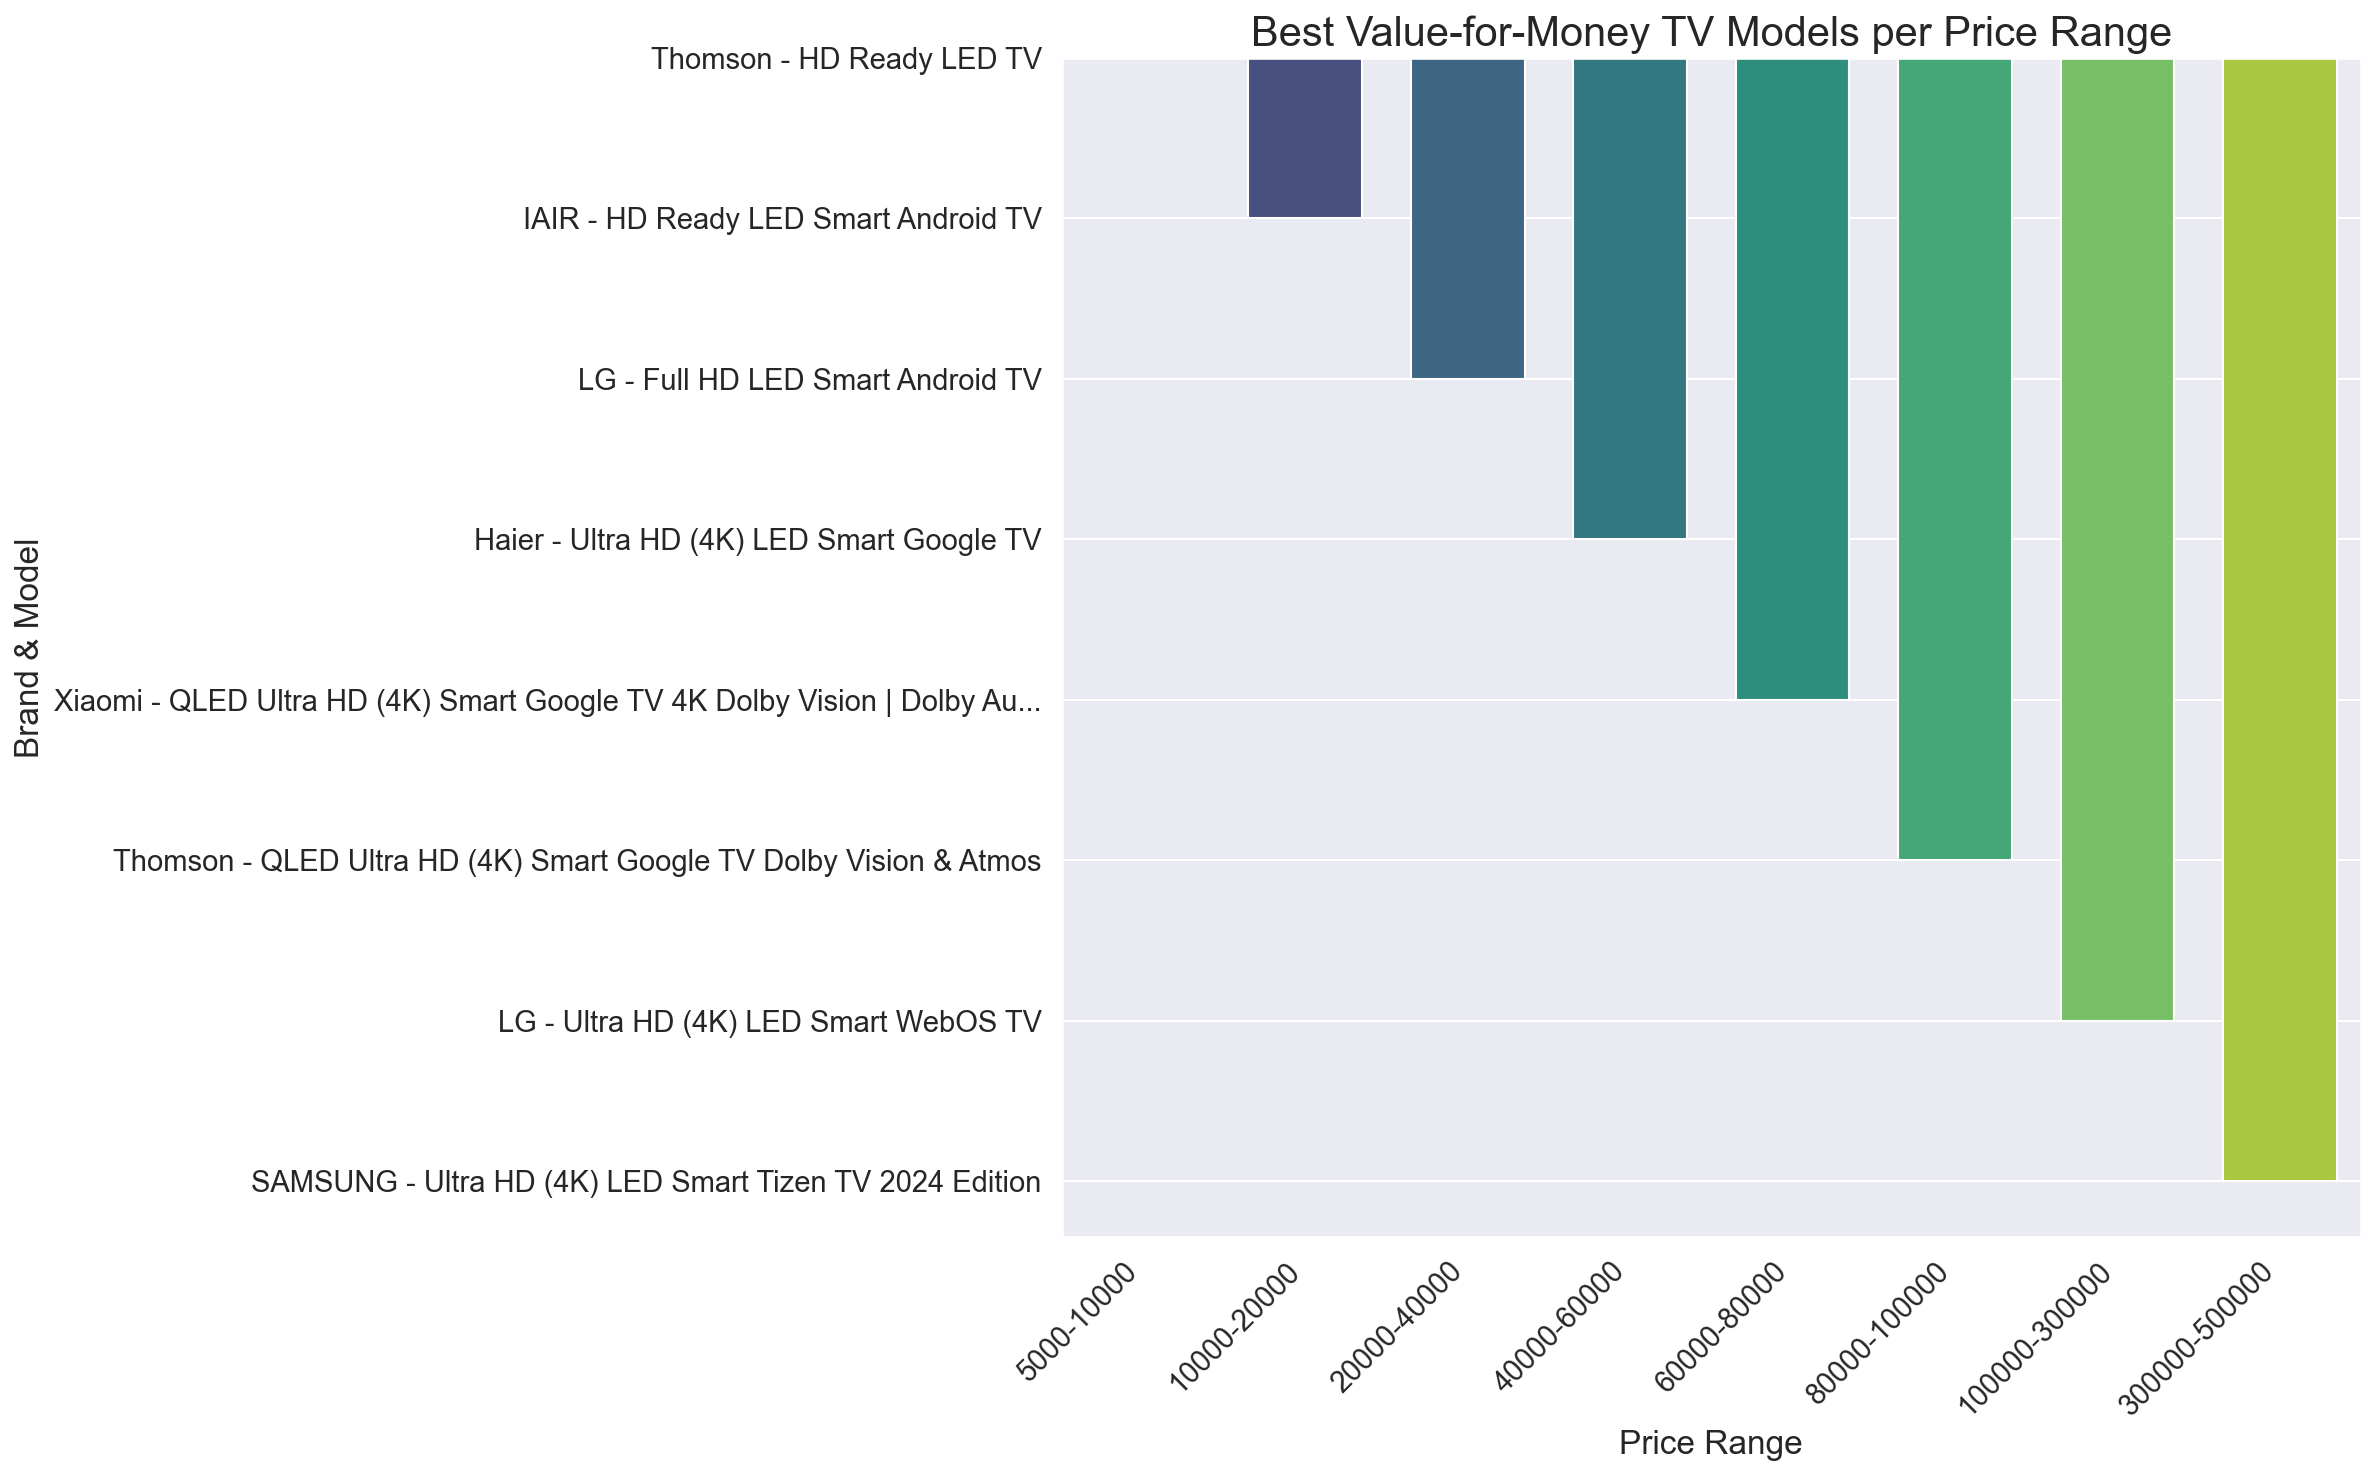

Best Value-for-Money TV Models per Price Range:
       Brand                                              Model    Price Range
339  Thomson                                    HD Ready LED TV     5000-10000
488     IAIR                      HD Ready LED Smart Android TV    10000-20000
735       LG                       Full HD LED Smart Android TV    20000-40000
319    Haier                  Ultra HD (4K) LED Smart Google TV    40000-60000
168   Xiaomi  QLED Ultra HD (4K) Smart Google TV 4K Dolby Vi...    60000-80000
717  Thomson  QLED Ultra HD (4K) Smart Google TV Dolby Visio...   80000-100000
754       LG                   Ultra HD (4K) LED Smart WebOS TV  100000-300000
373  SAMSUNG      Ultra HD (4K) LED Smart Tizen TV 2024 Edition  300000-500000


In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define price bins and labels
bins = [5000, 10000, 20000, 40000, 60000,80000, 100000, 300000,500000]
labels = [
    '5000-10000', '10000-20000', '20000-40000', 
    '40000-60000', '60000-80000' ,'80000-100000', '100000-300000', 
    '300000-500000'
    
]

# Create a Price Range column and drop NaN values
df['Price Range'] = pd.cut(df['Price'], bins=bins, labels=labels, include_lowest=True)
df = df.dropna(subset=['Price Range'])  # Remove NaN values in 'Price Range'

# Calculate VFM Score
df['VFM Score'] = df['Ratings'] / df['Price']

# Ensure each price range has at least one TV before using idxmax()
valid_groups = df.groupby('Price Range')['VFM Score'].count() > 0  # Check non-empty groups
valid_price_ranges = valid_groups[valid_groups].index  # Get valid price ranges

# Filter df to keep only valid price ranges
df_filtered = df[df['Price Range'].isin(valid_price_ranges)]

# Get best VFM models per price range
vfm_models = df_filtered.loc[df_filtered.groupby('Price Range')['VFM Score'].idxmax(), 
                             ['Brand', 'Model', 'Price Range']]

# Combine Brand and Model for display
vfm_models['Brand_Model'] = vfm_models['Brand'] + " - " + vfm_models['Model']

# --- Plotting ---
plt.figure(figsize=(16, 10), dpi=150)

ax = sns.barplot(x='Price Range', y='Brand_Model', data=vfm_models, palette='viridis', width=0.7)

plt.title("Best Value-for-Money TV Models per Price Range", fontsize=20)
plt.xlabel("Price Range", fontsize=16)
plt.ylabel("Brand & Model", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)  # Rotate x-axis labels for readability
plt.yticks(fontsize=14)

# Remove text labels (no VFM Score display)
plt.tight_layout()
plt.show()

# --- Displaying the results ---
print("Best Value-for-Money TV Models per Price Range:")
print(vfm_models[['Brand', 'Model', 'Price Range']])

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use a valid seaborn style
sns.set_theme(style="darkgrid")

# Define the brands that should be included
selected_brands = {"Thomson", "IAIR", "LG", "Haier", "Xiaomi", "SAMSUNG", "Sony", "Lloyd", "Samtonic", "Sansui",'TCL','realme','Panasonic','SONY'}

# Dynamically determine the best VFM brand for each price range
best_vfm_brands = df.loc[df.groupby('Price Range')['VFM Score'].idxmax(), ['Price Range', 'Brand']]
best_vfm_brands = best_vfm_brands.set_index('Price Range')['Brand'].to_dict()  # Convert to dictionary

# Unique price ranges
unique_price_ranges = df['Price Range'].unique()


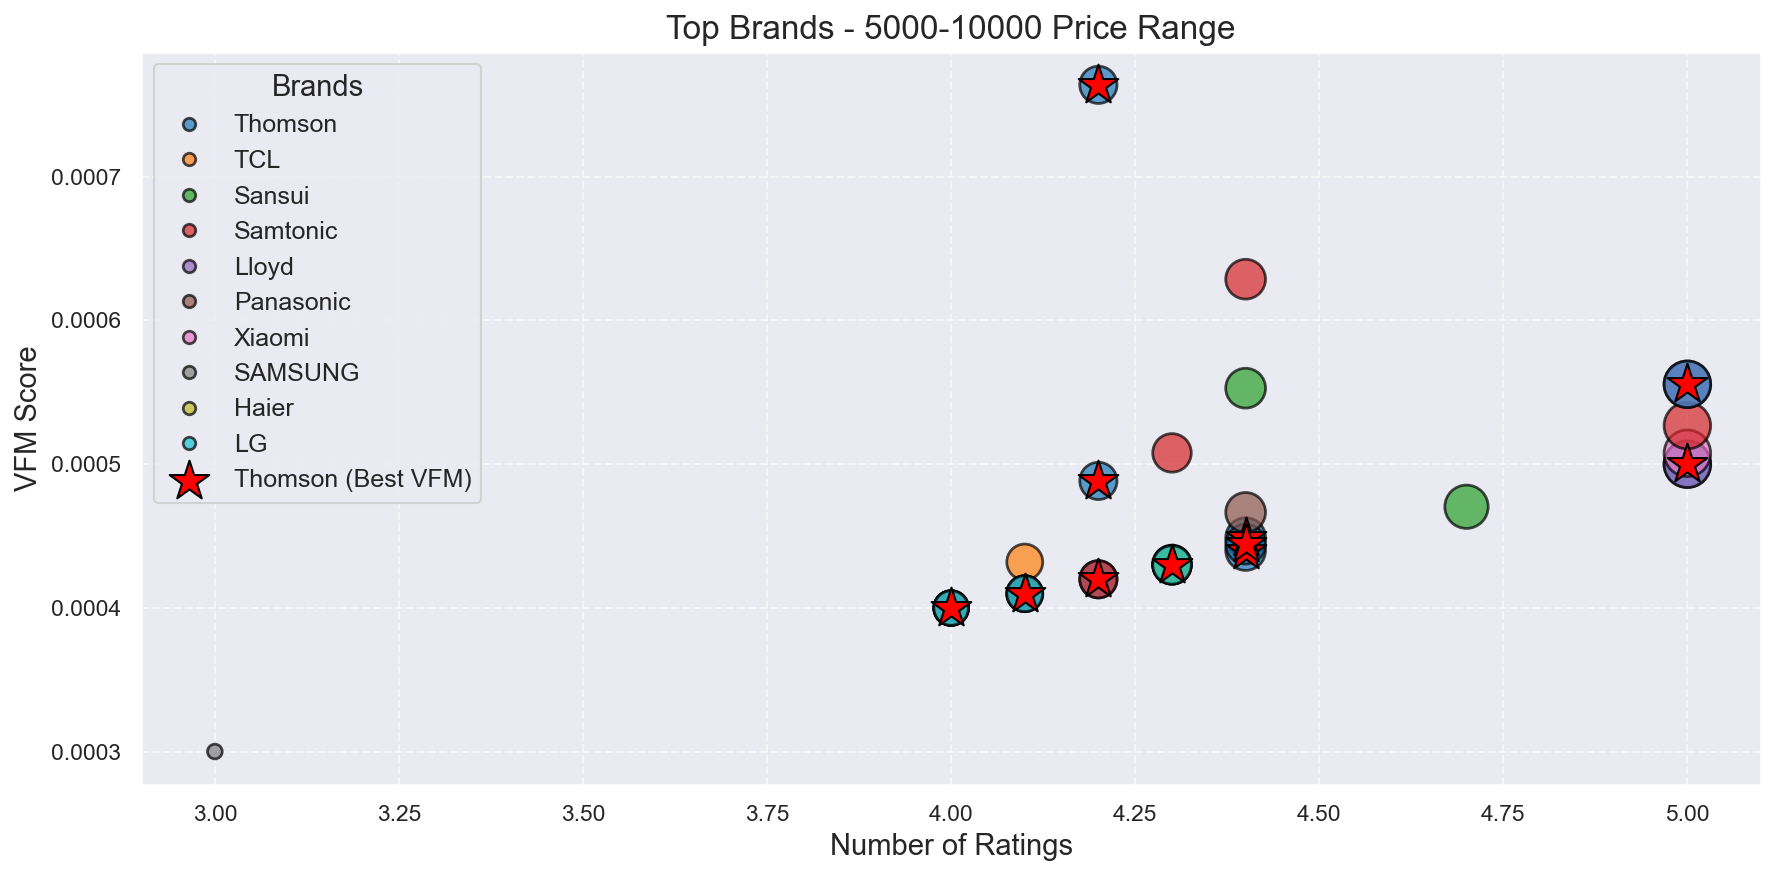

In [121]:
price_range = "5000-10000" 
df_subset = df[df['Price Range'] == price_range]
df_top = df_subset[df_subset['Brand'].isin(selected_brands)]

if not df_top.empty:  
    plt.figure(figsize=(12, 6), dpi=150)

    # Use a different color palette
    palette = sns.color_palette("tab10", len(selected_brands))
    
    scatter = sns.scatterplot(
        data=df_top,
        x='Ratings', 
        y='VFM Score', 
        size='Ratings', 
        sizes=(50, 500), 
        hue='Brand', 
        palette=palette,  # Apply the new color palette
        edgecolor='black', 
        alpha=0.7
    )

    # Highlight the best VFM brand in this price range
    highlight_brand = best_vfm_brands.get(price_range)
    if highlight_brand in selected_brands:
        highlight_data = df_top[df_top['Brand'] == highlight_brand]
        if not highlight_data.empty:
            plt.scatter(
                highlight_data['Ratings'], highlight_data['VFM Score'], 
                color='red', edgecolors='black', s=400, marker='*', 
                label=f"{highlight_brand} (Best VFM)"
            )

    # Modify legend to show only selected brands
    handles, labels = scatter.get_legend_handles_labels()
    
    # Filter legend to include only selected brands + best VFM brand
    filtered_handles_labels = [(h, l) for h, l in zip(handles, labels) if l in selected_brands or l == f"{highlight_brand} (Best VFM)"]
    
    if filtered_handles_labels:
        handles, labels = zip(*filtered_handles_labels)
        plt.legend(handles, labels, title="Brands", fontsize=12, title_fontsize=14, loc='upper left')

    plt.title(f"Top Brands - {price_range} Price Range", fontsize=16)
    plt.xlabel("Number of Ratings", fontsize=14)
    plt.ylabel("VFM Score", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


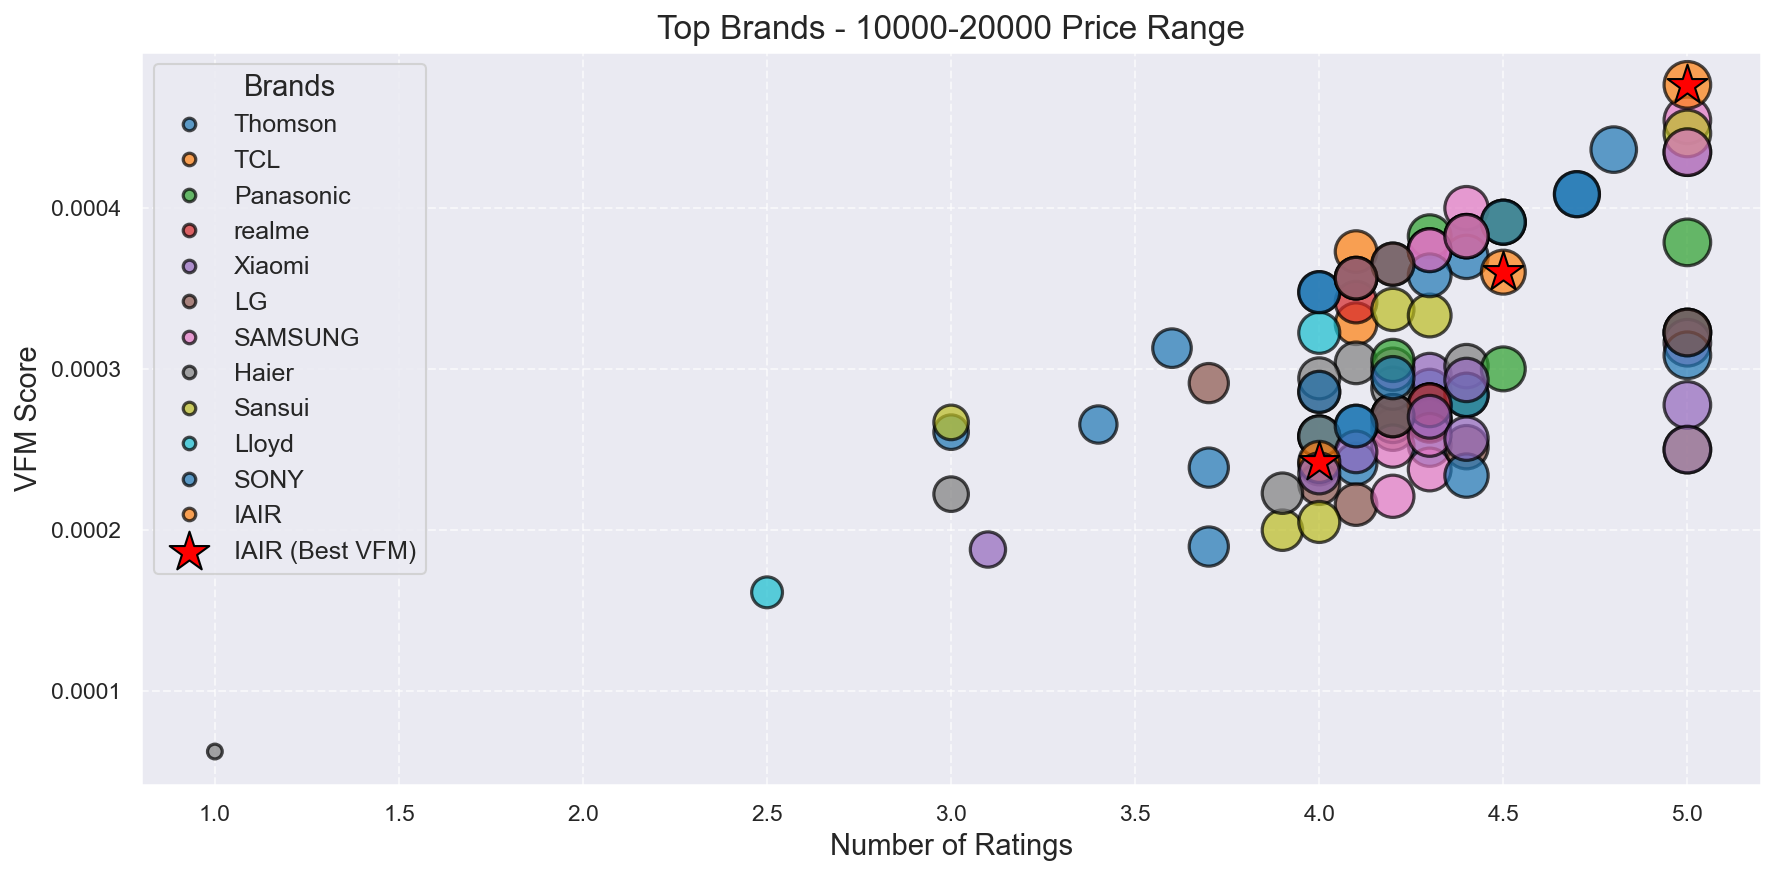

In [123]:
price_range = "10000-20000"  
df_subset = df[df['Price Range'] == price_range]
df_top = df_subset[df_subset['Brand'].isin(selected_brands)]

if not df_top.empty:  
    plt.figure(figsize=(12, 6), dpi=150)

    # Use a different color palette
    palette = sns.color_palette("tab10", len(selected_brands))
    
    scatter = sns.scatterplot(
        data=df_top,
        x='Ratings', 
        y='VFM Score', 
        size='Ratings', 
        sizes=(50, 500), 
        hue='Brand', 
        palette=palette,  # Apply the new color palette
        edgecolor='black', 
        alpha=0.7
    )

    # Highlight the best VFM brand in this price range
    highlight_brand = best_vfm_brands.get(price_range)
    if highlight_brand in selected_brands:
        highlight_data = df_top[df_top['Brand'] == highlight_brand]
        if not highlight_data.empty:
            plt.scatter(
                highlight_data['Ratings'], highlight_data['VFM Score'], 
                color='red', edgecolors='black', s=400, marker='*', 
                label=f"{highlight_brand} (Best VFM)"
            )

    # Modify legend to show only selected brands
    handles, labels = scatter.get_legend_handles_labels()
    
    # Filter legend to include only selected brands + best VFM brand
    filtered_handles_labels = [(h, l) for h, l in zip(handles, labels) if l in selected_brands or l == f"{highlight_brand} (Best VFM)"]
    
    if filtered_handles_labels:
        handles, labels = zip(*filtered_handles_labels)
        plt.legend(handles, labels, title="Brands", fontsize=12, title_fontsize=14, loc='upper left')

    plt.title(f"Top Brands - {price_range} Price Range", fontsize=16)
    plt.xlabel("Number of Ratings", fontsize=14)
    plt.ylabel("VFM Score", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


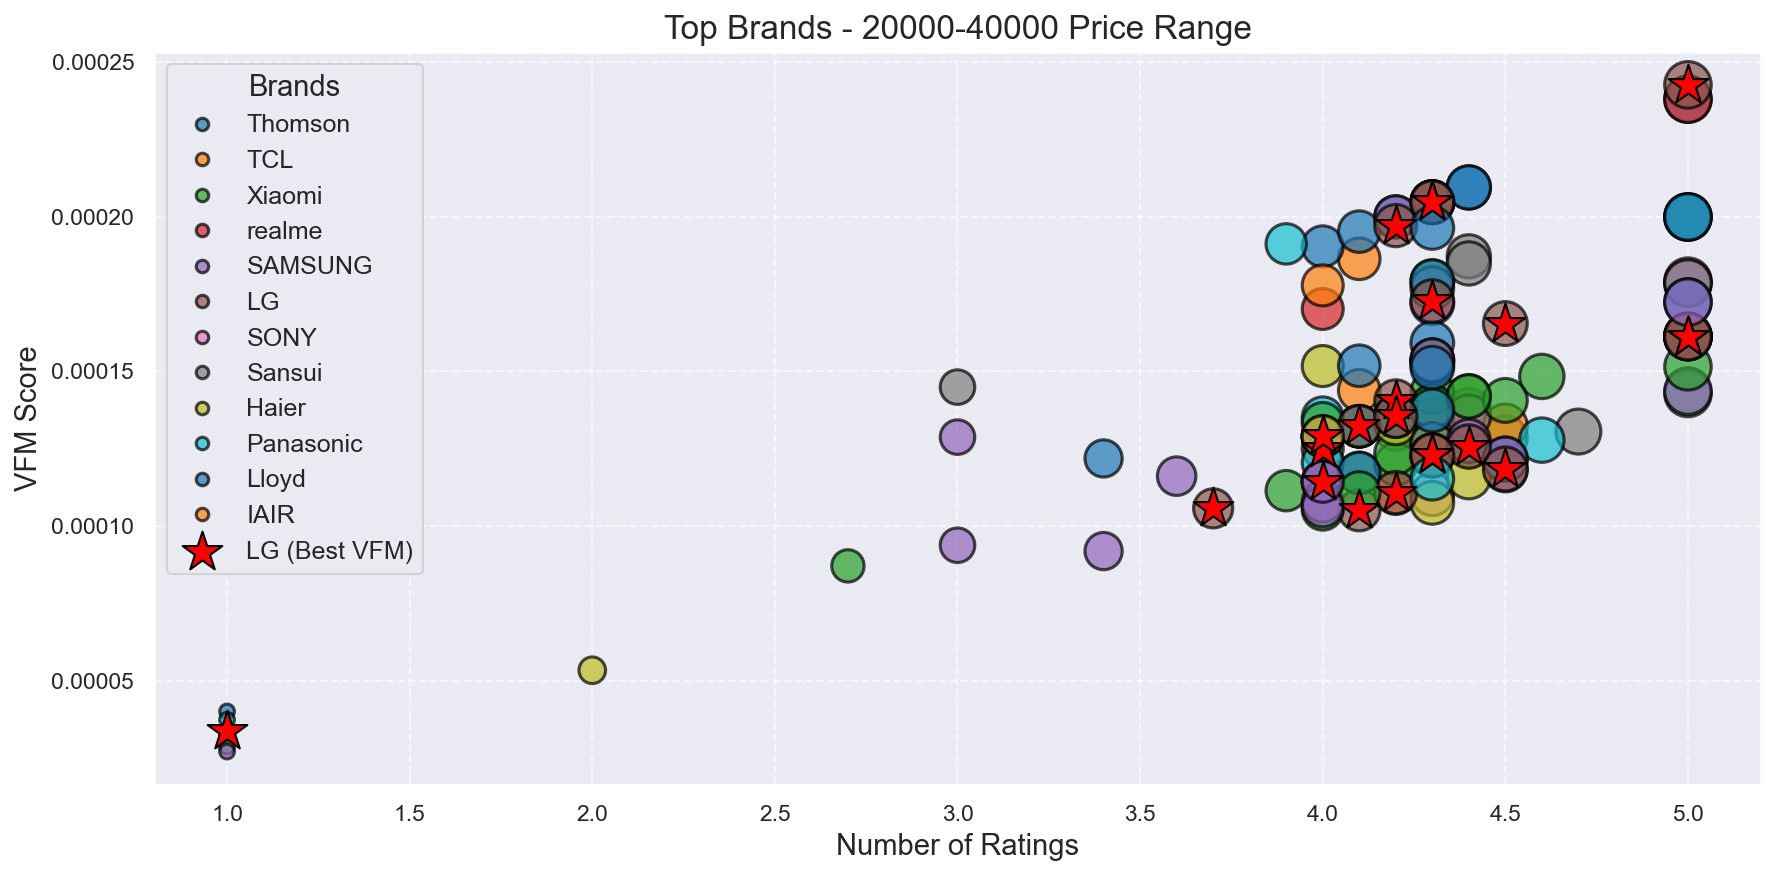

In [124]:
price_range = "20000-40000" 
df_subset = df[df['Price Range'] == price_range]
df_top = df_subset[df_subset['Brand'].isin(selected_brands)]

if not df_top.empty:  
    plt.figure(figsize=(12, 6), dpi=150)

    # Use a different color palette
    palette = sns.color_palette("tab10", len(selected_brands))
    
    scatter = sns.scatterplot(
        data=df_top,
        x='Ratings', 
        y='VFM Score', 
        size='Ratings', 
        sizes=(50, 500), 
        hue='Brand', 
        palette=palette,  # Apply the new color palette
        edgecolor='black', 
        alpha=0.7
    )

    # Highlight the best VFM brand in this price range
    highlight_brand = best_vfm_brands.get(price_range)
    if highlight_brand in selected_brands:
        highlight_data = df_top[df_top['Brand'] == highlight_brand]
        if not highlight_data.empty:
            plt.scatter(
                highlight_data['Ratings'], highlight_data['VFM Score'], 
                color='red', edgecolors='black', s=400, marker='*', 
                label=f"{highlight_brand} (Best VFM)"
            )

    # Modify legend to show only selected brands
    handles, labels = scatter.get_legend_handles_labels()
    
    # Filter legend to include only selected brands + best VFM brand
    filtered_handles_labels = [(h, l) for h, l in zip(handles, labels) if l in selected_brands or l == f"{highlight_brand} (Best VFM)"]
    
    if filtered_handles_labels:
        handles, labels = zip(*filtered_handles_labels)
        plt.legend(handles, labels, title="Brands", fontsize=12, title_fontsize=14, loc='upper left')

    plt.title(f"Top Brands - {price_range} Price Range", fontsize=16)
    plt.xlabel("Number of Ratings", fontsize=14)
    plt.ylabel("VFM Score", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


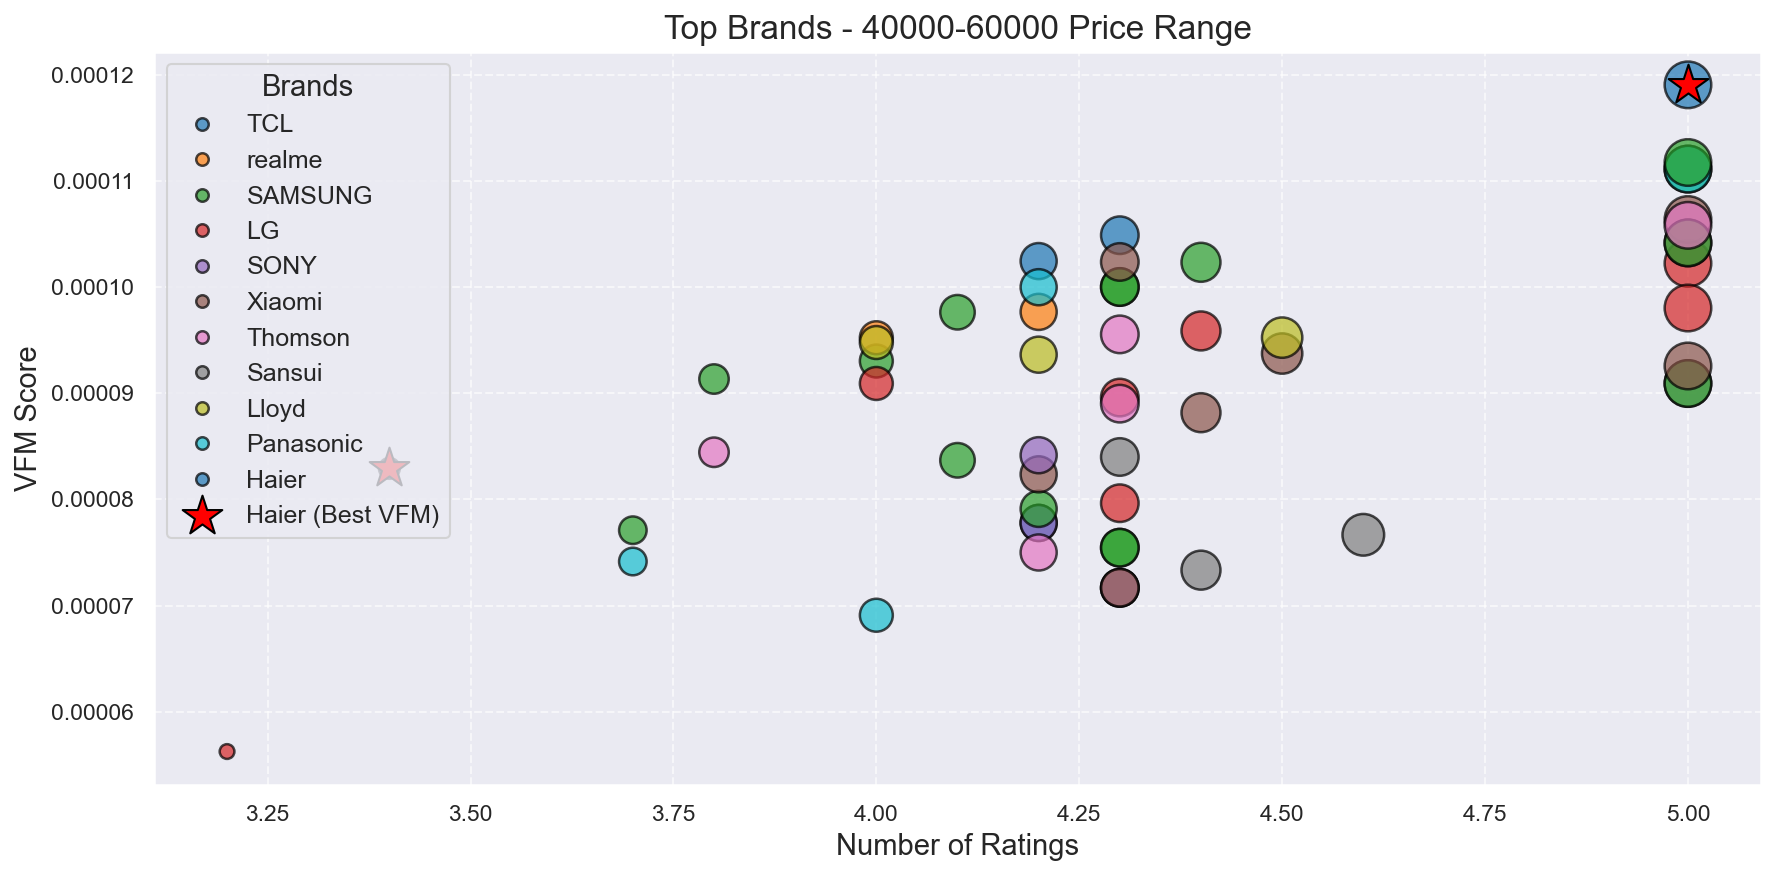

In [125]:
price_range = "40000-60000"  
df_subset = df[df['Price Range'] == price_range]
df_top = df_subset[df_subset['Brand'].isin(selected_brands)]

if not df_top.empty:  
    plt.figure(figsize=(12, 6), dpi=150)

    # Use a different color palette
    palette = sns.color_palette("tab10", len(selected_brands))
    
    scatter = sns.scatterplot(
        data=df_top,
        x='Ratings', 
        y='VFM Score', 
        size='Ratings', 
        sizes=(50, 500), 
        hue='Brand', 
        palette=palette,  # Apply the new color palette
        edgecolor='black', 
        alpha=0.7
    )

    # Highlight the best VFM brand in this price range
    highlight_brand = best_vfm_brands.get(price_range)
    if highlight_brand in selected_brands:
        highlight_data = df_top[df_top['Brand'] == highlight_brand]
        if not highlight_data.empty:
            plt.scatter(
                highlight_data['Ratings'], highlight_data['VFM Score'], 
                color='red', edgecolors='black', s=400, marker='*', 
                label=f"{highlight_brand} (Best VFM)"
            )

    # Modify legend to show only selected brands
    handles, labels = scatter.get_legend_handles_labels()
    
    # Filter legend to include only selected brands + best VFM brand
    filtered_handles_labels = [(h, l) for h, l in zip(handles, labels) if l in selected_brands or l == f"{highlight_brand} (Best VFM)"]
    
    if filtered_handles_labels:
        handles, labels = zip(*filtered_handles_labels)
        plt.legend(handles, labels, title="Brands", fontsize=12, title_fontsize=14, loc='upper left')

    plt.title(f"Top Brands - {price_range} Price Range", fontsize=16)
    plt.xlabel("Number of Ratings", fontsize=14)
    plt.ylabel("VFM Score", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


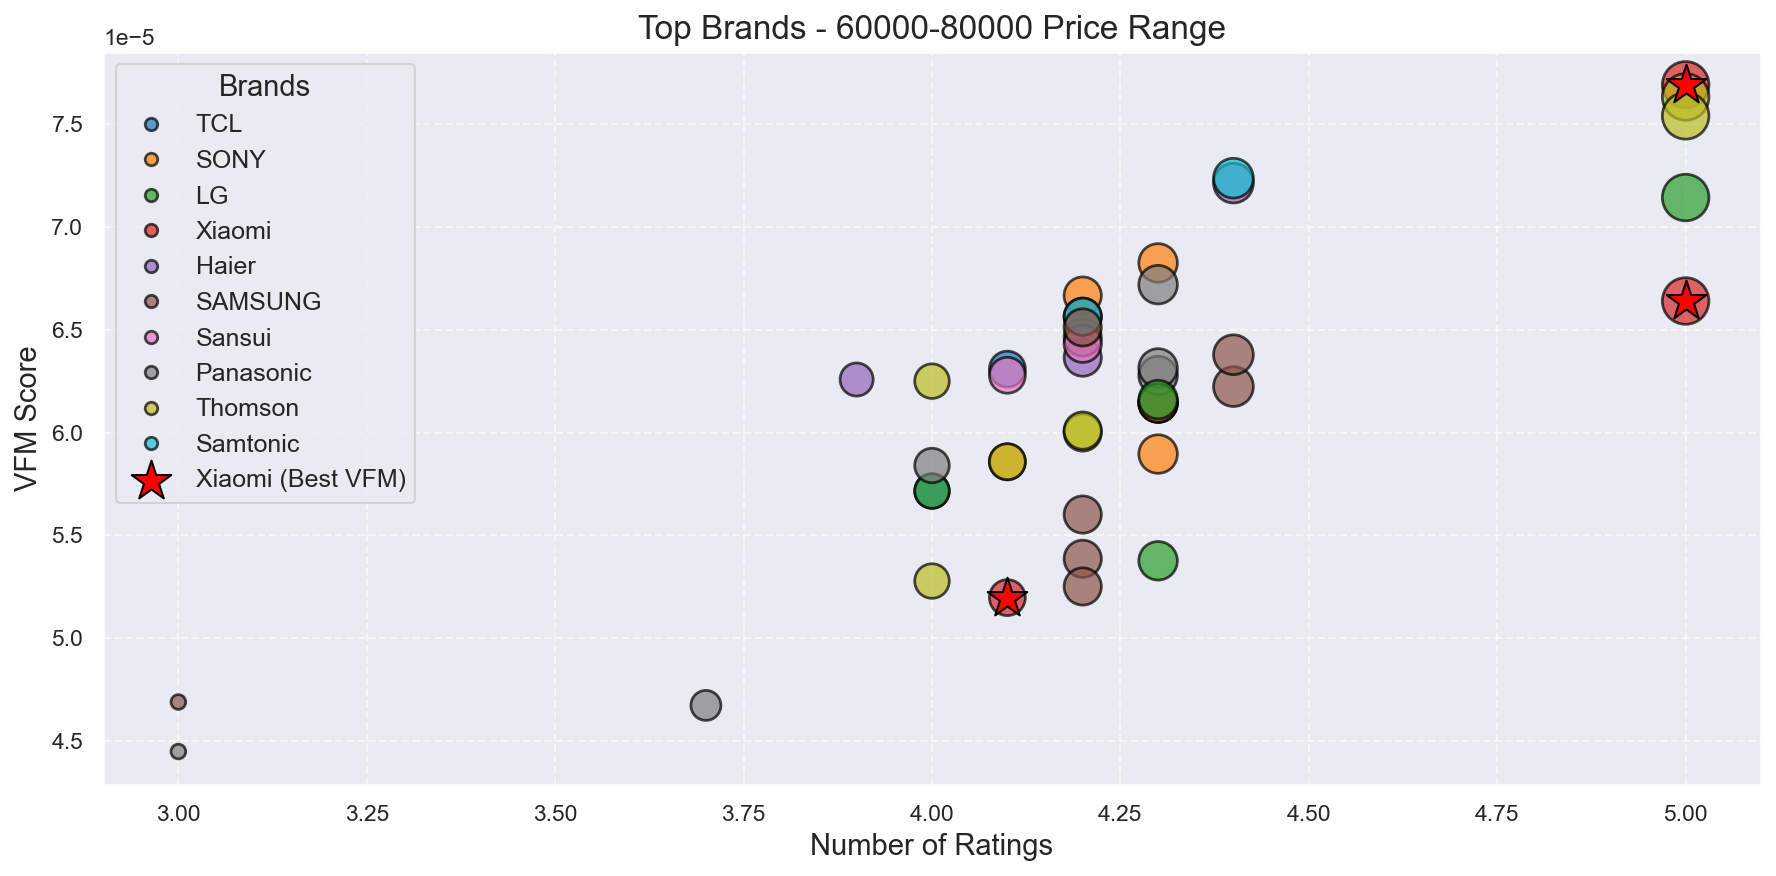

In [126]:
price_range = "60000-80000"  
df_subset = df[df['Price Range'] == price_range]
df_top = df_subset[df_subset['Brand'].isin(selected_brands)]

if not df_top.empty:  
    plt.figure(figsize=(12, 6), dpi=150)

    # Use a different color palette
    palette = sns.color_palette("tab10", len(selected_brands))
    
    scatter = sns.scatterplot(
        data=df_top,
        x='Ratings', 
        y='VFM Score', 
        size='Ratings', 
        sizes=(50, 500), 
        hue='Brand', 
        palette=palette,  # Apply the new color palette
        edgecolor='black', 
        alpha=0.7
    )

    # Highlight the best VFM brand in this price range
    highlight_brand = best_vfm_brands.get(price_range)
    if highlight_brand in selected_brands:
        highlight_data = df_top[df_top['Brand'] == highlight_brand]
        if not highlight_data.empty:
            plt.scatter(
                highlight_data['Ratings'], highlight_data['VFM Score'], 
                color='red', edgecolors='black', s=400, marker='*', 
                label=f"{highlight_brand} (Best VFM)"
            )

    # Modify legend to show only selected brands
    handles, labels = scatter.get_legend_handles_labels()
    
    # Filter legend to include only selected brands + best VFM brand
    filtered_handles_labels = [(h, l) for h, l in zip(handles, labels) if l in selected_brands or l == f"{highlight_brand} (Best VFM)"]
    
    if filtered_handles_labels:
        handles, labels = zip(*filtered_handles_labels)
        plt.legend(handles, labels, title="Brands", fontsize=12, title_fontsize=14, loc='upper left')

    plt.title(f"Top Brands - {price_range} Price Range", fontsize=16)
    plt.xlabel("Number of Ratings", fontsize=14)
    plt.ylabel("VFM Score", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


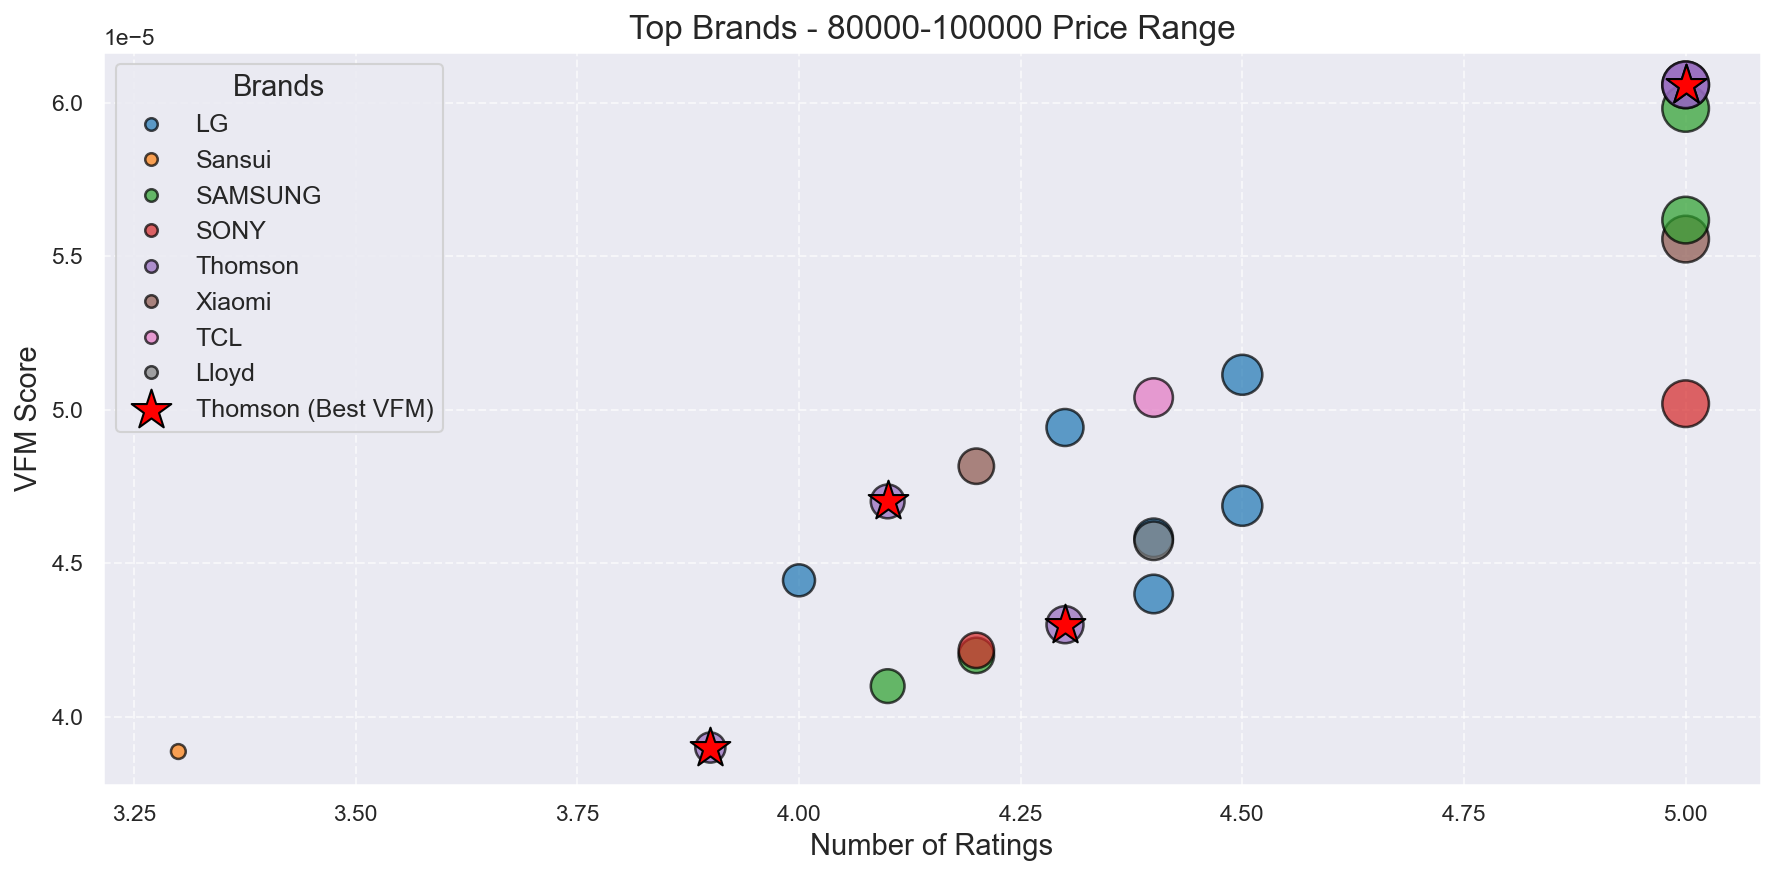

In [127]:
price_range = "80000-100000"  
df_subset = df[df['Price Range'] == price_range]
df_top = df_subset[df_subset['Brand'].isin(selected_brands)]

if not df_top.empty:  
    plt.figure(figsize=(12, 6), dpi=150)

    # Use a different color palette
    palette = sns.color_palette("tab10", len(selected_brands))
    
    scatter = sns.scatterplot(
        data=df_top,
        x='Ratings', 
        y='VFM Score', 
        size='Ratings', 
        sizes=(50, 500), 
        hue='Brand', 
        palette=palette,  # Apply the new color palette
        edgecolor='black', 
        alpha=0.7
    )

    # Highlight the best VFM brand in this price range
    highlight_brand = best_vfm_brands.get(price_range)
    if highlight_brand in selected_brands:
        highlight_data = df_top[df_top['Brand'] == highlight_brand]
        if not highlight_data.empty:
            plt.scatter(
                highlight_data['Ratings'], highlight_data['VFM Score'], 
                color='red', edgecolors='black', s=400, marker='*', 
                label=f"{highlight_brand} (Best VFM)"
            )

    # Modify legend to show only selected brands
    handles, labels = scatter.get_legend_handles_labels()
    
    # Filter legend to include only selected brands + best VFM brand
    filtered_handles_labels = [(h, l) for h, l in zip(handles, labels) if l in selected_brands or l == f"{highlight_brand} (Best VFM)"]
    
    if filtered_handles_labels:
        handles, labels = zip(*filtered_handles_labels)
        plt.legend(handles, labels, title="Brands", fontsize=12, title_fontsize=14, loc='upper left')

    plt.title(f"Top Brands - {price_range} Price Range", fontsize=16)
    plt.xlabel("Number of Ratings", fontsize=14)
    plt.ylabel("VFM Score", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


In [128]:
price_range = "100000-200000"  
df_subset = df[df['Price Range'] == price_range]
df_top = df_subset[df_subset['Brand'].isin(selected_brands)]

if not df_top.empty:  
    plt.figure(figsize=(12, 6), dpi=150)

    # Use a different color palette
    palette = sns.color_palette("tab10", len(selected_brands))
    
    scatter = sns.scatterplot(
        data=df_top,
        x='Ratings', 
        y='VFM Score', 
        size='Ratings', 
        sizes=(50, 500), 
        hue='Brand', 
        palette=palette,  # Apply the new color palette
        edgecolor='black', 
        alpha=0.7
    )

    # Highlight the best VFM brand in this price range
    highlight_brand = best_vfm_brands.get(price_range)
    if highlight_brand in selected_brands:
        highlight_data = df_top[df_top['Brand'] == highlight_brand]
        if not highlight_data.empty:
            plt.scatter(
                highlight_data['Ratings'], highlight_data['VFM Score'], 
                color='red', edgecolors='black', s=400, marker='*', 
                label=f"{highlight_brand} (Best VFM)"
            )

    # Modify legend to show only selected brands
    handles, labels = scatter.get_legend_handles_labels()
    
    # Filter legend to include only selected brands + best VFM brand
    filtered_handles_labels = [(h, l) for h, l in zip(handles, labels) if l in selected_brands or l == f"{highlight_brand} (Best VFM)"]
    
    if filtered_handles_labels:
        handles, labels = zip(*filtered_handles_labels)
        plt.legend(handles, labels, title="Brands", fontsize=12, title_fontsize=14, loc='upper left')

    plt.title(f"Top Brands - {price_range} Price Range", fontsize=16)
    plt.xlabel("Number of Ratings", fontsize=14)
    plt.ylabel("VFM Score", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


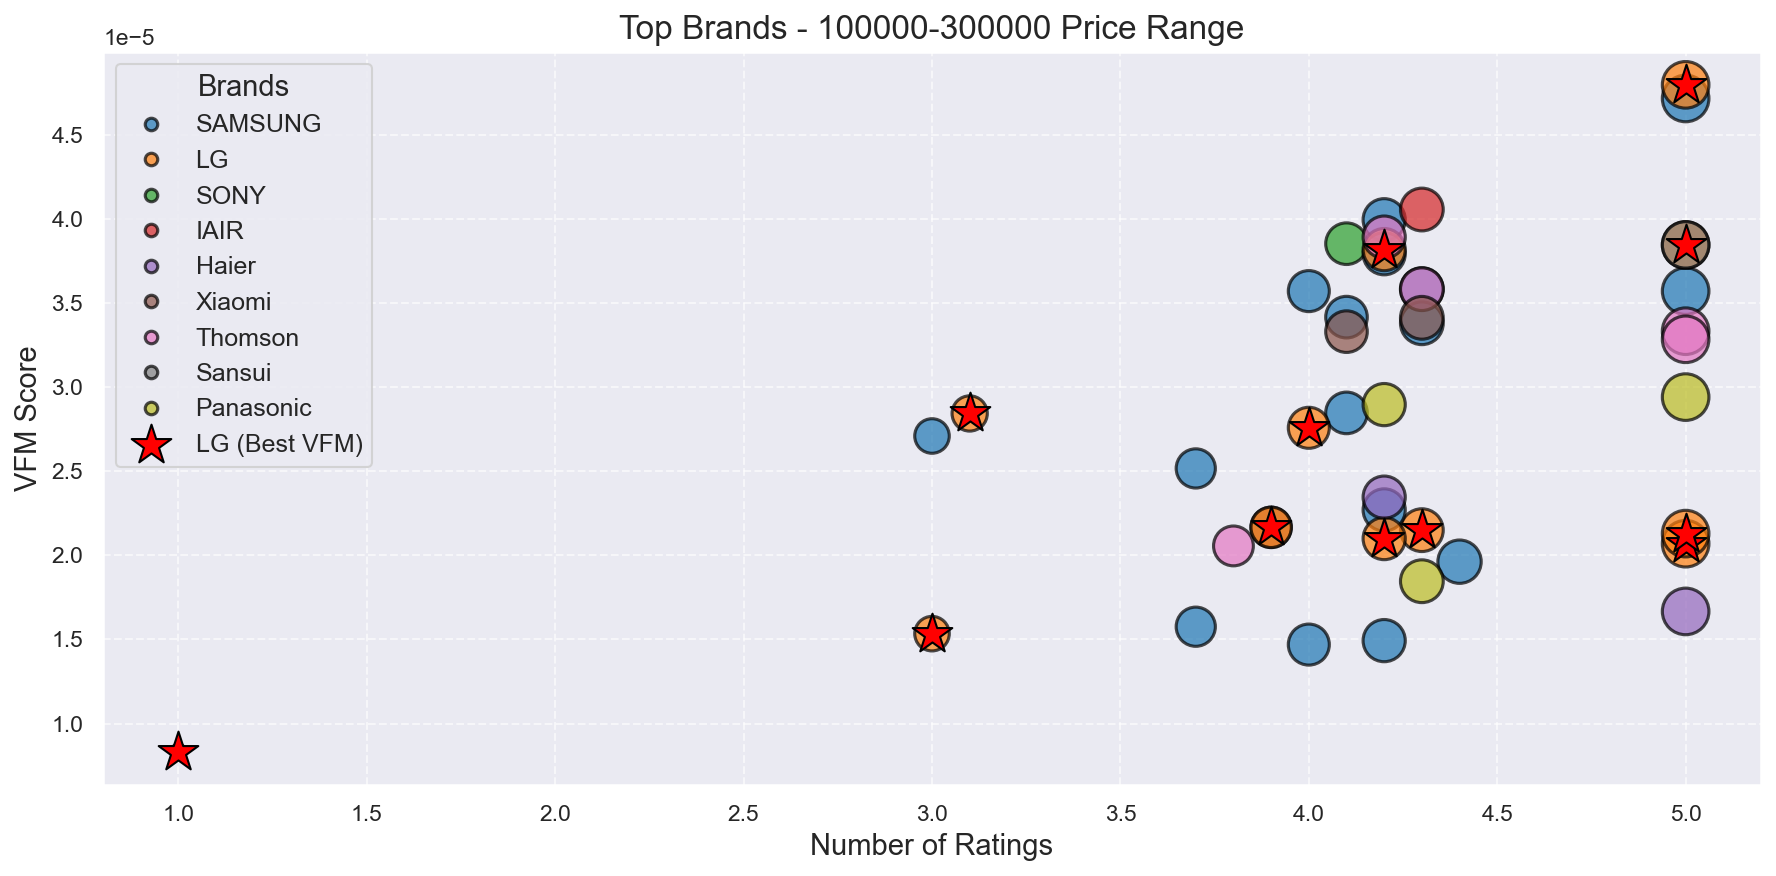

In [129]:
price_range = "100000-300000" 
df_subset = df[df['Price Range'] == price_range]
df_top = df_subset[df_subset['Brand'].isin(selected_brands)]

if not df_top.empty:  
    plt.figure(figsize=(12, 6), dpi=150)

    # Use a different color palette
    palette = sns.color_palette("tab10", len(selected_brands))
    
    scatter = sns.scatterplot(
        data=df_top,
        x='Ratings', 
        y='VFM Score', 
        size='Ratings', 
        sizes=(50, 500), 
        hue='Brand', 
        palette=palette,  # Apply the new color palette
        edgecolor='black', 
        alpha=0.7
    )

    # Highlight the best VFM brand in this price range
    highlight_brand = best_vfm_brands.get(price_range)
    if highlight_brand in selected_brands:
        highlight_data = df_top[df_top['Brand'] == highlight_brand]
        if not highlight_data.empty:
            plt.scatter(
                highlight_data['Ratings'], highlight_data['VFM Score'], 
                color='red', edgecolors='black', s=400, marker='*', 
                label=f"{highlight_brand} (Best VFM)"
            )

    # Modify legend to show only selected brands
    handles, labels = scatter.get_legend_handles_labels()
    
    # Filter legend to include only selected brands + best VFM brand
    filtered_handles_labels = [(h, l) for h, l in zip(handles, labels) if l in selected_brands or l == f"{highlight_brand} (Best VFM)"]
    
    if filtered_handles_labels:
        handles, labels = zip(*filtered_handles_labels)
        plt.legend(handles, labels, title="Brands", fontsize=12, title_fontsize=14, loc='upper left')

    plt.title(f"Top Brands - {price_range} Price Range", fontsize=16)
    plt.xlabel("Number of Ratings", fontsize=14)
    plt.ylabel("VFM Score", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


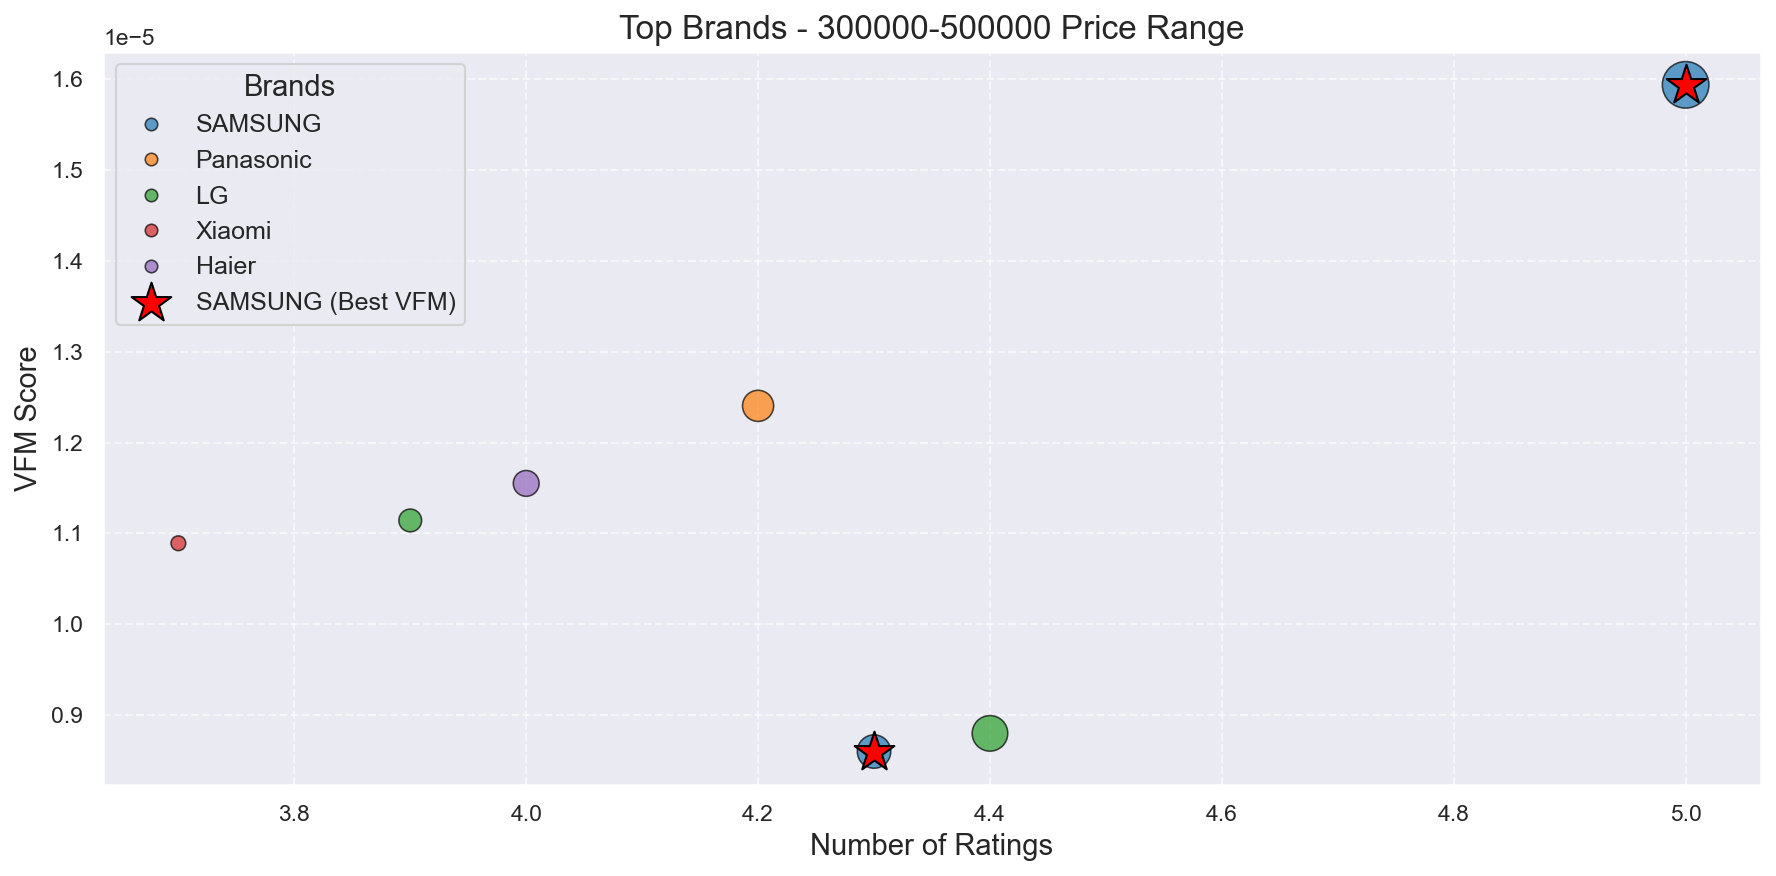

In [130]:
price_range = "300000-500000"  
df_subset = df[df['Price Range'] == price_range]
df_top = df_subset[df_subset['Brand'].isin(selected_brands)]

if not df_top.empty:  
    plt.figure(figsize=(12, 6), dpi=150)

    # Use a different color palette
    palette = sns.color_palette("tab10", len(selected_brands))
    
    scatter = sns.scatterplot(
        data=df_top,
        x='Ratings', 
        y='VFM Score', 
        size='Ratings', 
        sizes=(50, 500), 
        hue='Brand', 
        palette=palette,  # Apply the new color palette
        edgecolor='black', 
        alpha=0.7
    )

    # Highlight the best VFM brand in this price range
    highlight_brand = best_vfm_brands.get(price_range)
    if highlight_brand in selected_brands:
        highlight_data = df_top[df_top['Brand'] == highlight_brand]
        if not highlight_data.empty:
            plt.scatter(
                highlight_data['Ratings'], highlight_data['VFM Score'], 
                color='red', edgecolors='black', s=400, marker='*', 
                label=f"{highlight_brand} (Best VFM)"
            )

    # Modify legend to show only selected brands
    handles, labels = scatter.get_legend_handles_labels()
    
    # Filter legend to include only selected brands + best VFM brand
    filtered_handles_labels = [(h, l) for h, l in zip(handles, labels) if l in selected_brands or l == f"{highlight_brand} (Best VFM)"]
    
    if filtered_handles_labels:
        handles, labels = zip(*filtered_handles_labels)
        plt.legend(handles, labels, title="Brands", fontsize=12, title_fontsize=14, loc='upper left')

    plt.title(f"Top Brands - {price_range} Price Range", fontsize=16)
    plt.xlabel("Number of Ratings", fontsize=14)
    plt.ylabel("VFM Score", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


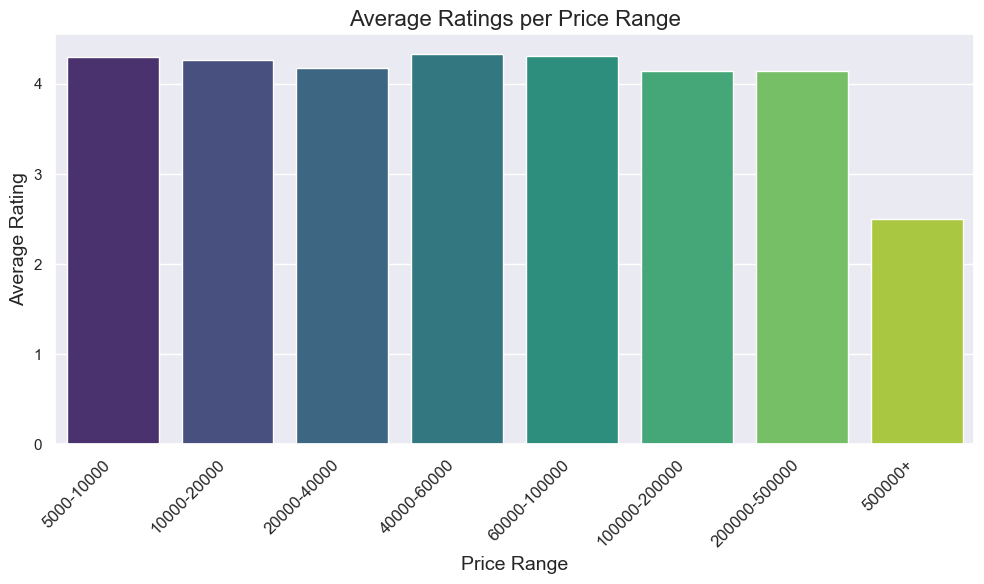

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define price bins and labels (actual values instead of 'K')
bins = [ 5000, 10000, 20000, 40000, 60000, 100000, 200000, 500000, 10000000]
labels = [
     '5000-10000', '10000-20000', '20000-40000', 
    '40000-60000', '60000-100000', '100000-200000', 
    '200000-500000', '500000+'
]  # Now with actual values

df['Price Range'] = pd.cut(df['Price'], bins=bins, labels=labels, include_lowest=True)

# Compute the average ratings per price range
avg_ratings_per_price = df.groupby('Price Range')['Ratings'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(x=avg_ratings_per_price.index, y=avg_ratings_per_price.values, palette='viridis')
plt.title('Average Ratings per Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


In [55]:
df['Price Range'].unique()

['5000-10000', '10000-20000', '20000-40000', '40000-60000', '60000-100000', '100000-200000', '200000-500000', '500000+']
Categories (8, object): ['5000-10000' < '10000-20000' < '20000-40000' < '40000-60000' < '60000-100000' < '100000-200000' < '200000-500000' < '500000+']

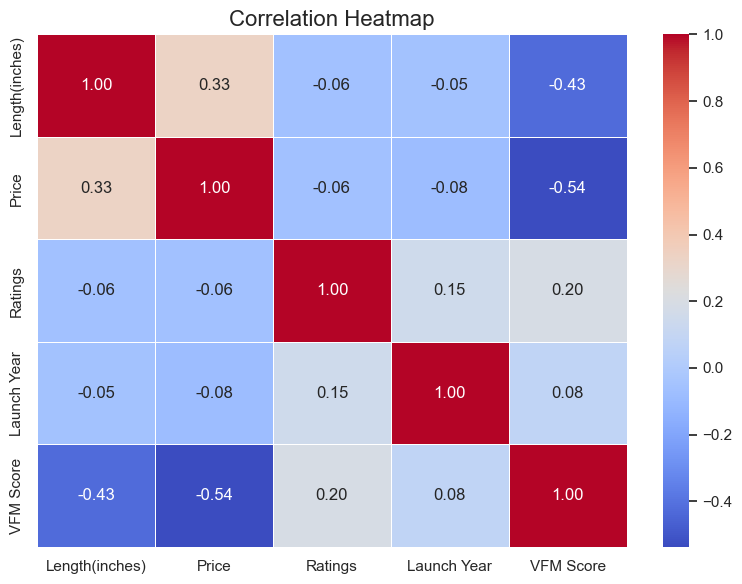

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
corr = df.select_dtypes(include=['number']).corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)  # Optional
plt.tight_layout()
plt.show()


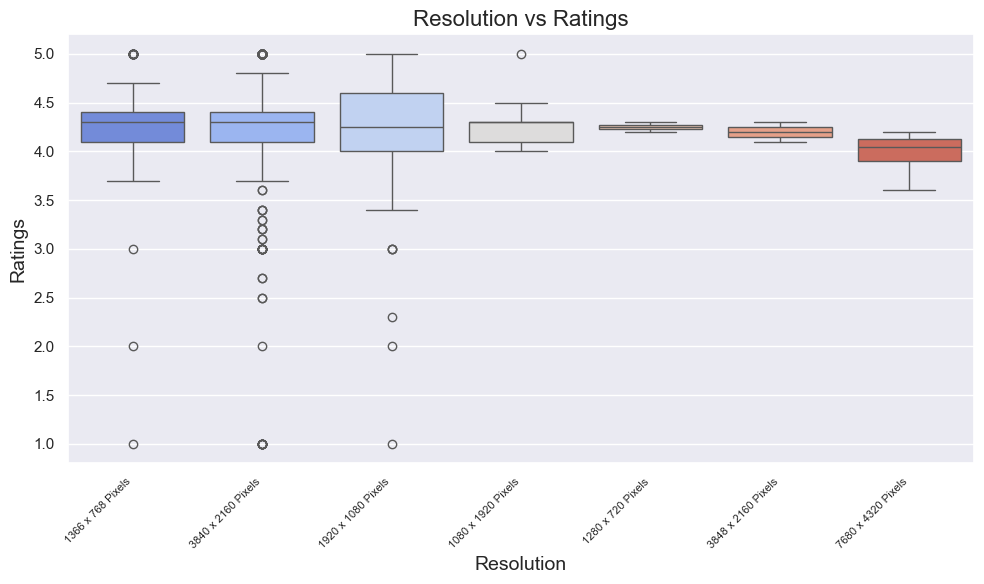

In [57]:

resolution_counts = df['Resolution'].value_counts()
frequent_resolutions = resolution_counts[resolution_counts > 1].index  

df_filtered = df[df['Resolution'].isin(frequent_resolutions)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Resolution', y='Ratings', data=df_filtered, palette='coolwarm') 
plt.title('Resolution vs Ratings', fontsize=16) 
plt.xlabel('Resolution', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

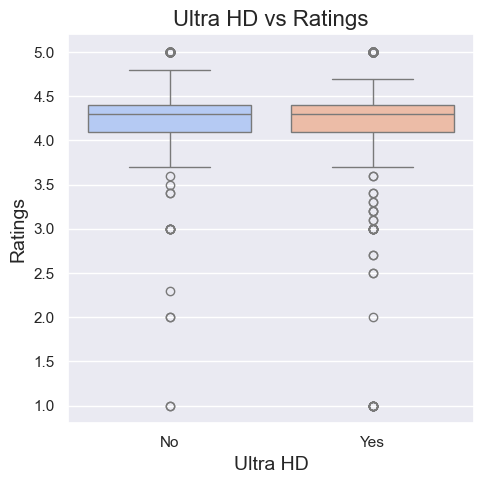

In [58]:
#Ultra HD vs Ratings (Boxplot or Violin Plot)
plt.figure(figsize=(5, 5))
sns.boxplot(x='Ultra HD', y='Ratings', data=df, palette='coolwarm')
plt.title('Ultra HD vs Ratings', fontsize=16)
plt.xlabel('Ultra HD', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.tight_layout()
plt.show()


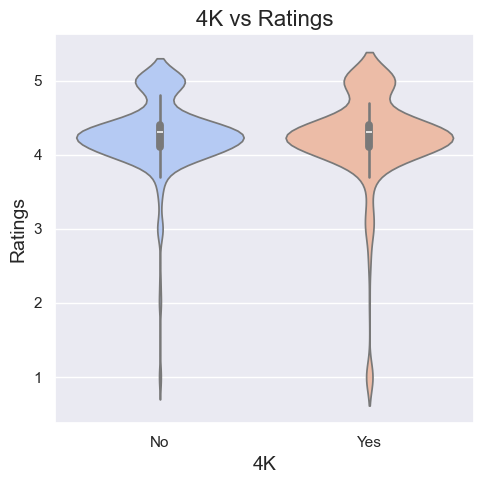

In [59]:
#4K vs Ratings (Boxplot or Violin Plot)
plt.figure(figsize=(5,5))
sns.violinplot(x='4K', y='Ratings', data=df, palette='coolwarm')
plt.title('4K vs Ratings', fontsize=16)
plt.xlabel('4K', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.tight_layout()
plt.show()


In [60]:
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Ultra HD', y='VFM Score', data=df, palette='coolwarm')
# plt.title('VFM Score vs Ultra HD', fontsize=16)
# plt.xlabel('Ultra HD', fontsize=14)
# plt.ylabel('VFM Score', fontsize=14)
# plt.tight_layout()
# plt.show()
